<a href="https://colab.research.google.com/github/Aledean16/Proyecto_Final/blob/main/Proyecto_Final_Muebleria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#Carga de datos
from google.colab import files
import pandas as pd

# Selecciona el archivo desde tu sistema local
uploaded = files.upload()

Saving Base_de_datos_Proyecto.csv to Base_de_datos_Proyecto.csv


In [5]:
# Limpiar los datos usando Pandas
# Eliminar filas con valores faltantes
df=pd.read_csv('Base_de_datos_Proyecto.csv')
df.sample()
df.dropna(inplace=True)

In [6]:
# Identificar y corregir errores (por ejemplo, valores atípicos extremos)
# Suponiendo que 'log_price Columna B' es la columna que representa los precios de las viviendas
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

In [7]:
# Filtrar valores atípicos extremos
df = df[~((df['log_price'] < (Q1 - 1.5 * IQR)) | (df['log_price'] > (Q3 + 1.5 * IQR)))]

In [9]:
# Calcular estadísticas para cada variable

import statistics as stats
datos_logprice=df['log_price']
datos_longitude=df['longitude']
datos_latitude=df['latitude']

statistics = df.describe()
# Calcular la media
media = stats.mean(datos_logprice)
media_longitude = stats.mean(datos_longitude)
media_latitude = stats.mean(datos_latitude)
print(f"Media: {media}")
print(f"Media long: {media_longitude}")
print(f"Media lat: {media_latitude}")

# Calcular la mediana
mediana = stats.median(datos_logprice)
mediana_longitude = stats.median(datos_longitude)
mediana_latitude = stats.median(datos_latitude)
print(f"Mediana: {mediana}")
print(f"Mediana long: {mediana_longitude}")
print(f"Mediana lat: {mediana_latitude}")

# Calcular la desviación estándar
desviacion_estandar = stats.stdev(datos_logprice)
desviacion_estandar_longitude = stats.stdev(datos_longitude)
desviacion_estandar_latitude = stats.stdev(datos_latitude)
print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Desviación Estándar long: {desviacion_estandar_longitude}")
print(f"Desviación Estándar lat: {desviacion_estandar_latitude}")

Media: 4.726141419575007
Media long: -90.79600487836537
Media lat: 38.769374277615704
Mediana: 4.691347882229144
Mediana long: -74.00100659094116
Mediana lat: 40.68285180564305
Desviación Estándar: 0.6114391461582076
Desviación Estándar long: 21.417812980896013
Desviación Estándar lat: 3.0048293278605085


In [10]:
# Identificar variables que podrían influir en los precios de las viviendas
data = {
    'property_type': ['House', 'Apartment', 'Villa', 'Dorm'],
    'room_type': ['Entire home/apt', 'Private room', 'Shared room'],
    'amenities': ['{TV}'],
    'accommodates': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'bathrooms': [1, 2, 3, 4, 5, 6, 7, 8],
    'bed_type': ['Real Bed', 'Air Bed', 'Futon'],
}

# Codificación one-hot de las variables categóricas
df_encoded = pd.get_dummies(df, columns=['property_type', 'room_type', 'bed_type'])

# Mostrar las primeras filas del DataFrame codificado
print(df_encoded.head())

# Visualizar la matriz de correlación usando un heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.show()

         id  log_price                                          amenities  \
1   6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2   7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
5  12422935   4.442651  {TV,"Wireless Internet",Heating,"Smoke detecto...   
7  13971273   4.787492  {TV,"Cable TV","Wireless Internet","Wheelchair...   
8    180792   4.787492  {TV,"Cable TV","Wireless Internet","Pets live ...   

   accommodates  bathrooms cancellation_policy  cleaning_fee city  \
1             7        1.0              strict          True  NYC   
2             5        1.0            moderate          True  NYC   
5             2        1.0              strict          True   SF   
7             2        1.0            moderate          True   LA   
8             2        1.0            moderate          True   SF   

                                         description first_review  ...  \
1  Enjoy travelling during your stay in Manhatta

<Figure size 1200x800 with 0 Axes>

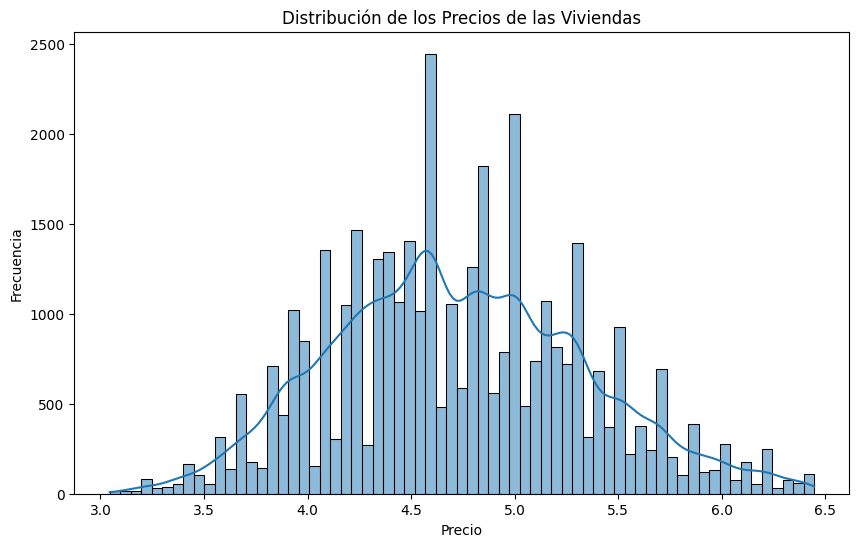

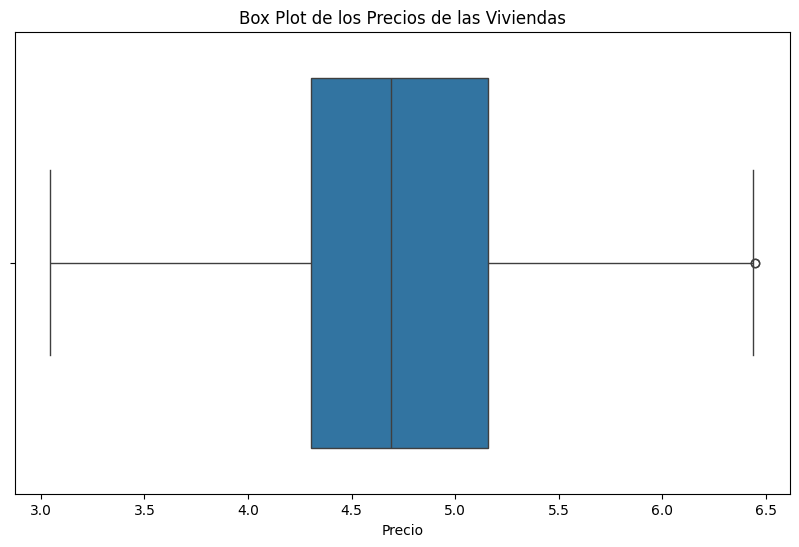

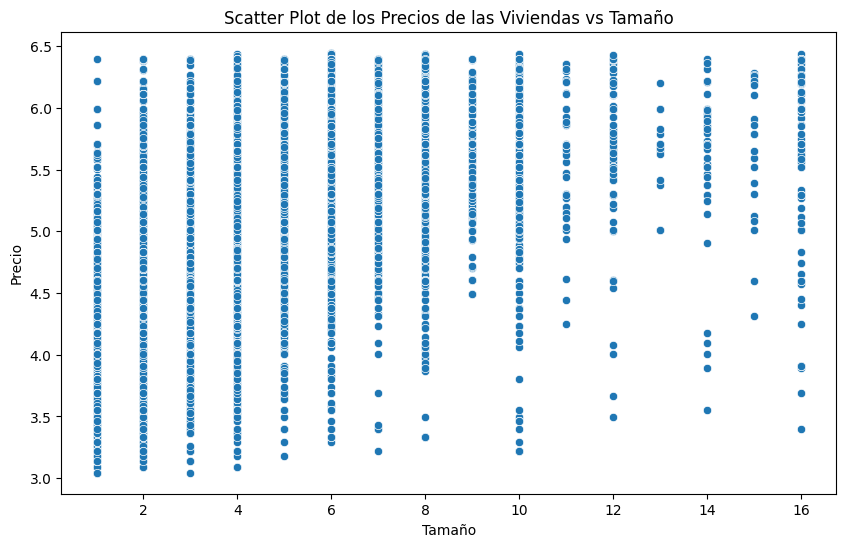

In [11]:
# Generar visualizaciones
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True)
plt.title('Distribución de los Precios de las Viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_price'])
plt.title('Box Plot de los Precios de las Viviendas')
plt.xlabel('Precio')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['accommodates'], y=df['log_price'])
plt.title('Scatter Plot de los Precios de las Viviendas vs Tamaño')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.show()


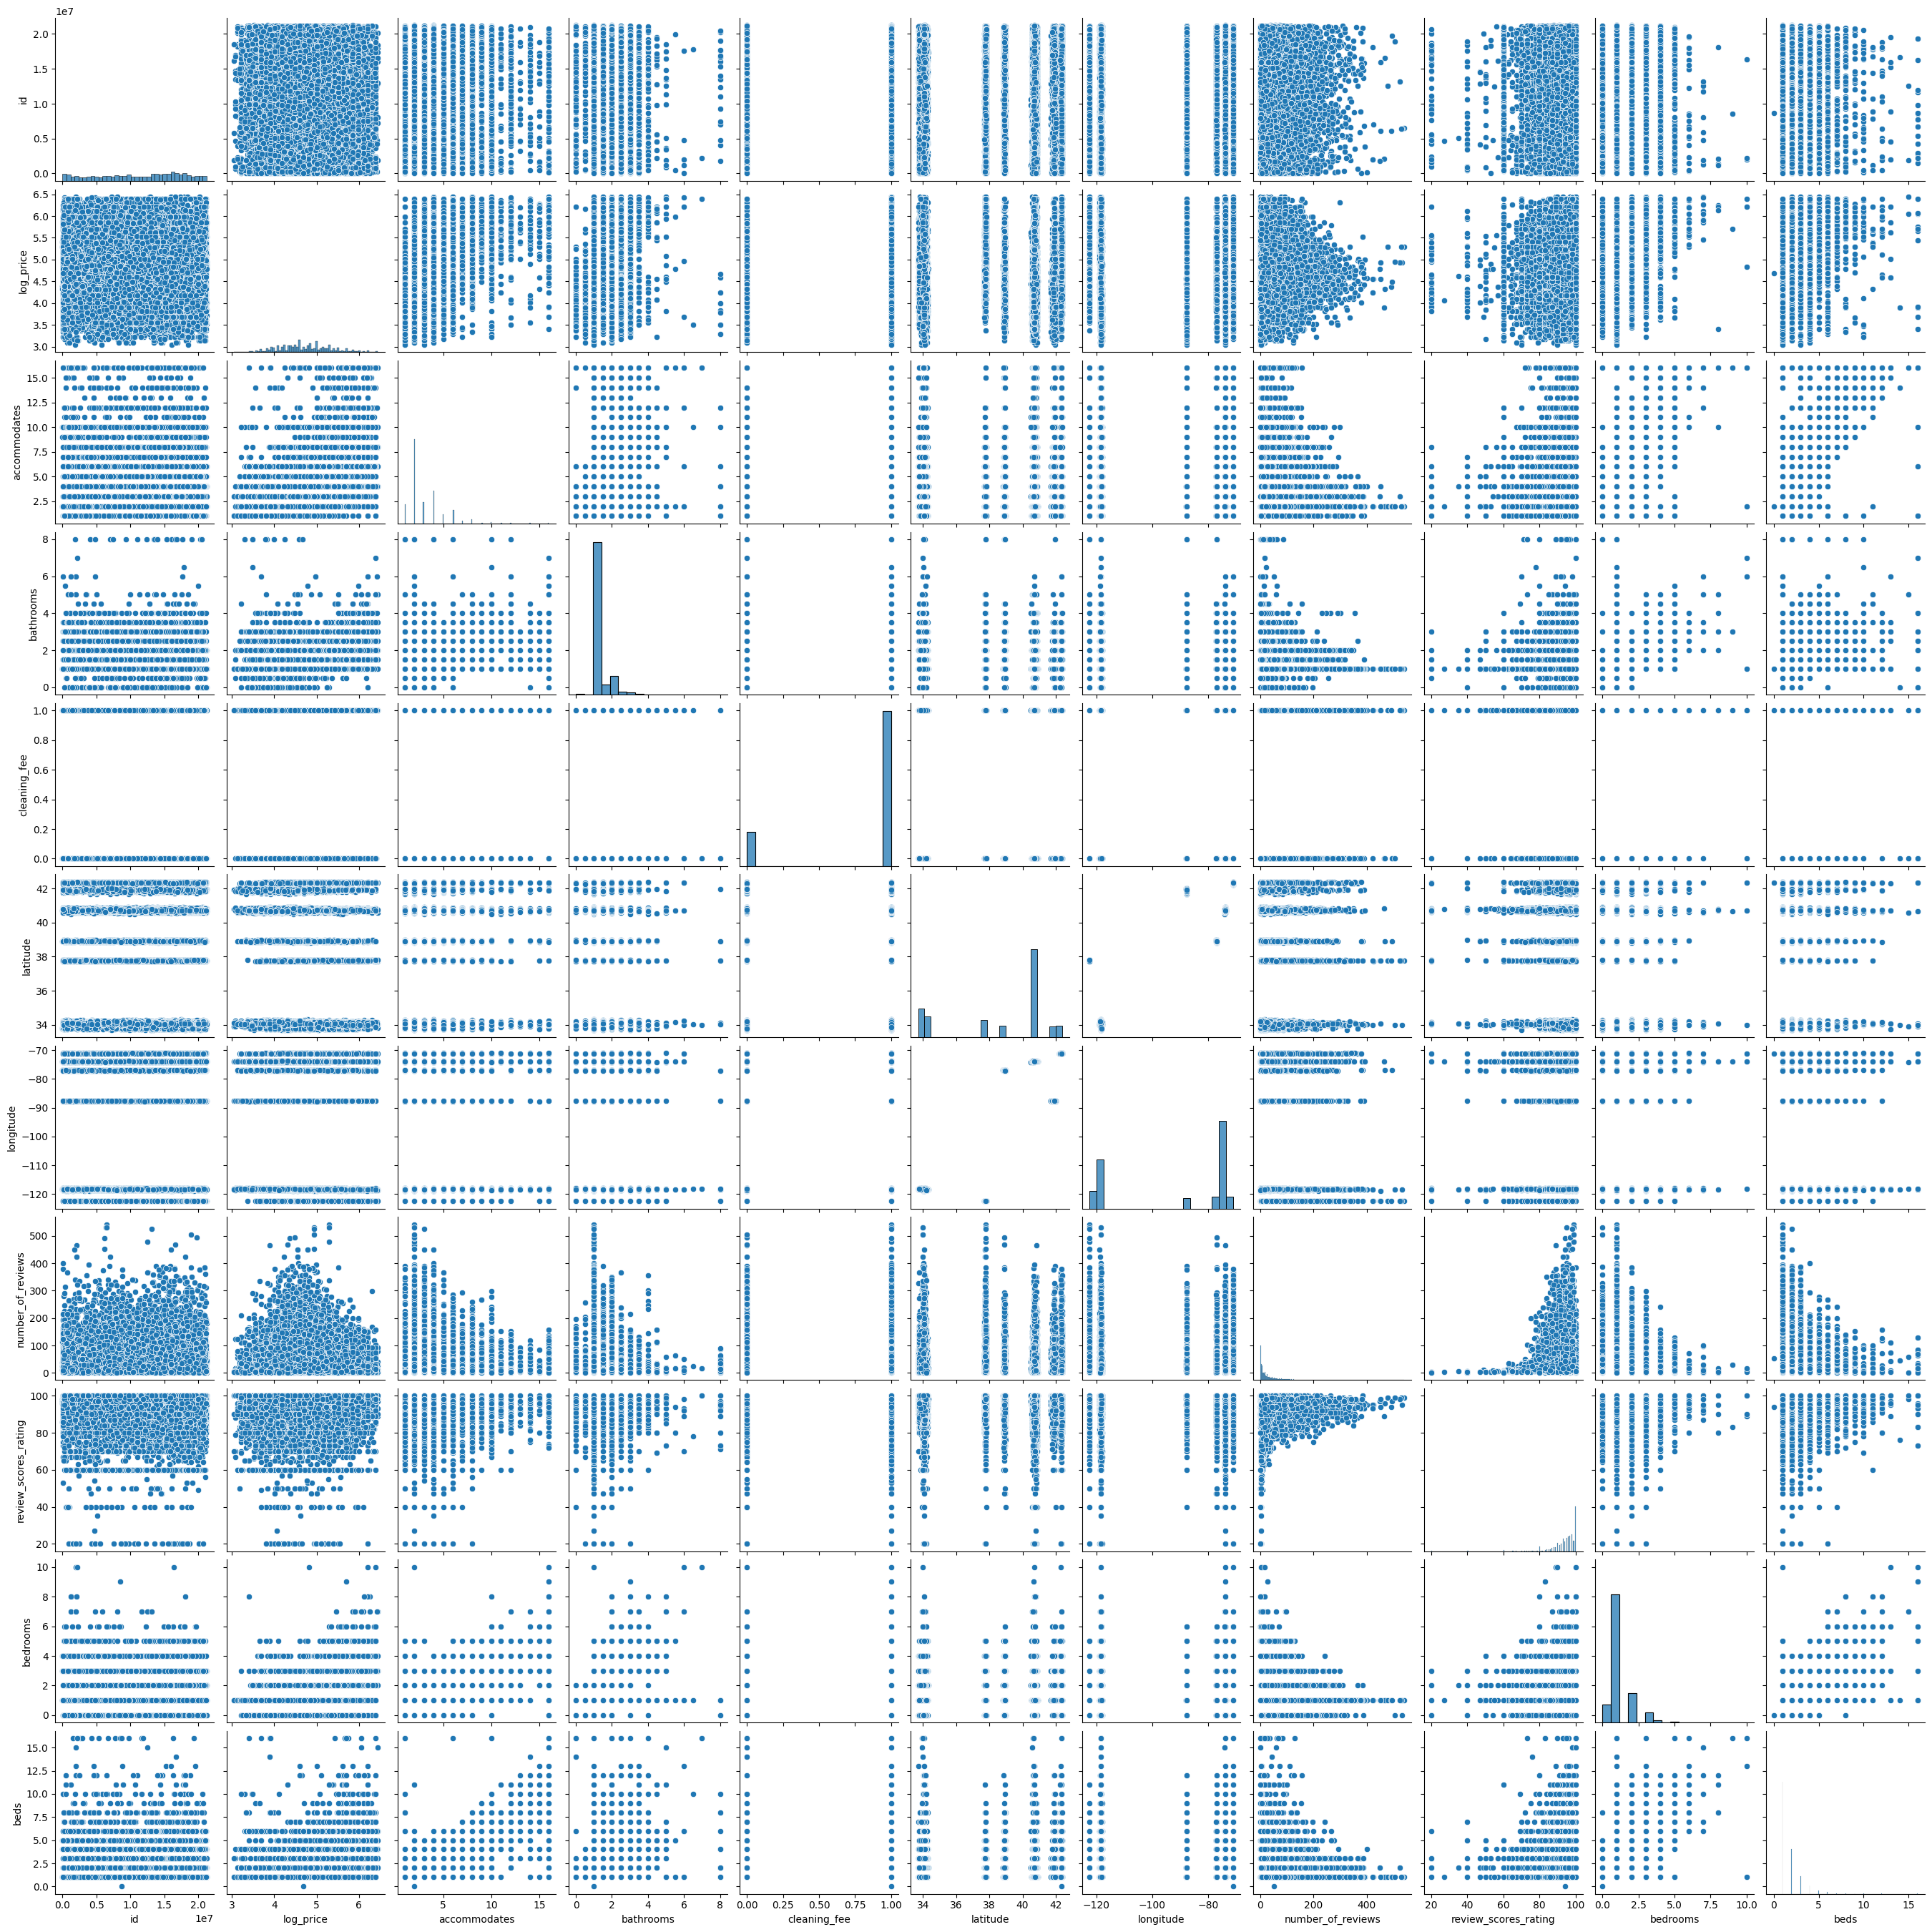

In [14]:
sns.pairplot(df)
plt.show()

In [25]:
#Carga de datos
from google.colab import files
import pandas as pd

# Selecciona el archivo desde tu sistema local
uploaded = files.upload()

Saving Base_de_datos_Proyecto.csv to Base_de_datos_Proyecto (4).csv


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Datos de ejemplo
data = {
    'id': [1, 2, 3, 4, 5],
    'log_price': [5.3, 4.8, 5.0, 4.9, 5.1],
    'property_type': ['House', 'Apartment', 'House', 'Apartment', 'House'],
    'room_type': ['Private room', 'Entire home/apt', 'Private room', 'Entire home/apt', 'Private room'],
    'amenities': ['Wifi, Kitchen', 'Wifi, Kitchen, Pool', 'Wifi, Kitchen', 'Wifi, Kitchen, Pool', 'Wifi, Kitchen'],
    'accommodates': [2, 4, 2, 4, 2],
    'bathrooms': [1, 2, 1, 2, 1],
    'bed_type': ['Real Bed', 'Real Bed', 'Real Bed', 'Real Bed', 'Real Bed'],
    'cancellation_policy': ['flexible', 'strict', 'flexible', 'strict', 'flexible'],
    'cleaning_fee': [20, 30, 20, 30, 20],
    'city': ['CityA', 'CityB', 'CityA', 'CityB', 'CityA'],
    'description': ['Nice place', 'Great place', 'Nice place', 'Great place', 'Nice place'],
    'first_review': ['2020-01-01', '2020-02-01', '2020-01-01', '2020-02-01', '2020-01-01'],
    'host_has_profile_pic': [True, True, True, True, True],
    'host_identity_verified': [True, True, True, True, True],
    'host_response_rate': [90, 80, 90, 80, 90],
    'host_since': ['2019-01-01', '2019-02-01', '2019-01-01', '2019-02-01', '2019-01-01'],
    'instant_bookable': [True, False, True, False, True],
    'last_review': ['2020-03-01', '2020-04-01', '2020-03-01', '2020-04-01', '2020-03-01'],
    'latitude': [40.7128, 34.0522, 40.7128, 34.0522, 40.7128],
    'longitude': [-74.0060, -118.2437, -74.0060, -118.2437, -74.0060],
    'name': ['Place1', 'Place2', 'Place3', 'Place4', 'Place5'],
    # Agrega más variables según sea necesario
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Definir características y variable objetivo
X = df.drop(columns=['log_price'])
y = df['log_price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:")
print(X_train)
print(y_train)

print("\nConjunto de prueba:")
print(X_test)
print(y_test)




Conjunto de entrenamiento:
   id property_type        room_type            amenities  accommodates  \
4   5         House     Private room        Wifi, Kitchen             2   
2   3         House     Private room        Wifi, Kitchen             2   
0   1         House     Private room        Wifi, Kitchen             2   
3   4     Apartment  Entire home/apt  Wifi, Kitchen, Pool             4   

   bathrooms  bed_type cancellation_policy  cleaning_fee   city  ...  \
4          1  Real Bed            flexible            20  CityA  ...   
2          1  Real Bed            flexible            20  CityA  ...   
0          1  Real Bed            flexible            20  CityA  ...   
3          2  Real Bed              strict            30  CityB  ...   

  first_review host_has_profile_pic  host_identity_verified  \
4   2020-01-01                 True                    True   
2   2020-01-01                 True                    True   
0   2020-01-01                 True            

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Datos de ejemplo
data = {
    'id': [1, 2, 3, 4, 5],
    'log_price': [5.3, 4.8, 5.0, 4.9, 5.1],
    'property_type': ['House', 'Apartment', 'House', 'Apartment', 'House'],
    'room_type': ['Private room', 'Entire home/apt', 'Private room', 'Entire home/apt', 'Private room'],
    'amenities': ['Wifi, Kitchen', 'Wifi, Kitchen, Pool', 'Wifi, Kitchen', 'Wifi, Kitchen, Pool', 'Wifi, Kitchen'],
    'accommodates': [2, 4, 2, 4, 2],
    'bathrooms': [1, 2, 1, 2, 1],
    'bed_type': ['Real Bed', 'Real Bed', 'Real Bed', 'Real Bed', 'Real Bed'],
    'cancellation_policy': ['flexible', 'strict', 'flexible', 'strict', 'flexible'],
    'cleaning_fee': [20, 30, 20, 30, 20],
    'city': ['CityA', 'CityB', 'CityA', 'CityB', 'CityA'],
    'description': ['Nice place', 'Great place', 'Nice place', 'Great place', 'Nice place'],
    'first_review': ['2020-01-01', '2020-02-01', '2020-01-01', '2020-02-01', '2020-01-01'],
    'host_has_profile_pic': [True, True, True, True, True],
    'host_identity_verified': [True, True, True, True, True],
    'host_response_rate': [90, 80, 90, 80, 90],
    'host_since': ['2019-01-01', '2019-02-01', '2019-01-01', '2019-02-01', '2019-01-01'],
    'instant_bookable': [True, False, True, False, True],
    'last_review': ['2020-03-01', '2020-04-01', '2020-03-01', '2020-04-01', '2020-03-01'],
    'latitude': [40.7128, 34.0522, 40.7128, 34.0522, 40.7128],
    'longitude': [-74.0060, -118.2437, -74.0060, -118.2437, -74.0060],
    # Agrega más variables según sea necesario
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Eliminar columnas no numéricas para la regresión
numeric_df = df.drop(columns=['id','property_type','room_type','amenities','bed_type','cancellation_policy','city','description','first_review','host_has_profile_pic','host_identity_verified','host_since','instant_bookable','last_review'])

# Definir características y variable objetivo
X = numeric_df.drop(columns=['log_price'])
y = numeric_df['log_price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir los coeficientes del modelo
print("Coeficientes:", model.coef_)

# Imprimir el intercepto del modelo
print("Intercepto:", model.intercept_)

# Evaluar la multicolinealidad utilizando VIF (Factor de Inflación de Varianza)
X_train_with_constant = sm.add_constant(X_train)
vif = pd.Series([sm.OLS(X_train_with_constant.iloc[:, i], X_train_with_constant.drop(columns=[X_train_with_constant.columns[i]])).fit().rsquared for i in range(X_train_with_constant.shape[1])], index=X_train_with_constant.columns)
print("VIF:\n", vif)

# Imprimir el valor R-cuadrado del modelo
print("R-cuadrado:", model.score(X_test,y_test))


Coeficientes: [-0.00021151 -0.00010576 -0.00105756  0.00105756  0.0007044   0.0046784 ]
Intercepto: 5.377384593786824
VIF:
 const                -inf
accommodates          1.0
bathrooms             1.0
cleaning_fee          1.0
host_response_rate    1.0
latitude              1.0
longitude             1.0
dtype: float64
R-cuadrado: nan


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
